In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
def preprocess_data(selector_type):
    train_df = pd.read_csv(f'processed_data/train_{selector_type}.csv')
    val_df = pd.read_csv(f'processed_data/val_{selector_type}.csv')
    test_df = pd.read_csv(f'processed_data/test_{selector_type}.csv')

    # Separate features and target
    X_train = train_df.drop(['image_path', 'ClassId'], axis=1)
    y_train = train_df['ClassId']

    X_val = val_df.drop(['image_path', 'ClassId'], axis=1)
    y_val = val_df['ClassId']

    X_test = test_df.drop(['image_path', 'ClassId'], axis=1)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled

In [23]:
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    return acc

In [24]:
def train_models(selector_type):    
	X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled = preprocess_data(selector_type)
    
	# KNN Classifier
	knn_model = KNeighborsClassifier(n_neighbors=5)
	knn_model.fit(X_train_scaled, y_train)
	knn_acc = evaluate_model(knn_model, X_val_scaled, y_val, "KNN")
	
    # XGBoost Classifier
	xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
	xgb_model.fit(X_train_scaled, y_train)
	xgb_acc = evaluate_model(xgb_model, X_val_scaled, y_val, "XGBoost")
    
	# SVM Classifier
	svm_model = SVC(kernel='rbf', probability=True, random_state=42)
	svm_model.fit(X_train_scaled, y_train)
	svm_acc = evaluate_model(svm_model, X_val_scaled, y_val, "SVM")
    
    # Random Forest Classifier
	rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
	rf_model.fit(X_train_scaled, y_train)
	rf_acc = evaluate_model(rf_model, X_val_scaled, y_val, "Random Forest")

	model_names = ["KNN", "XGBoost", "SVM", "Random Forest"]
	accs = [knn_acc, xgb_acc, svm_acc, rf_acc]

	plt.figure(figsize=(6, 4))
	plt.bar(model_names, accs)
	plt.title('Model Comparison - Validation Accuracy')
	plt.ylabel('Accuracy')
	plt.ylim(0, 1)
	for i, v in enumerate(accs):
		plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

	best_model_index = np.argmax(accs)
	best_model_name = model_names[best_model_index]
	print(f"Best model with {selector_type} feature selection: {best_model_name} with accuracy {accs[best_model_index]:.4f}")

    # Generate predictions with the best model
	if best_model_index == 0:
		best_model = knn_model
	elif best_model_index == 1:
		best_model = xgb_model
	elif best_model_index == 2:
		best_model = svm_model
	else:
		best_model = rf_model

Best model with rf feature selection: SVM with accuracy 0.8115


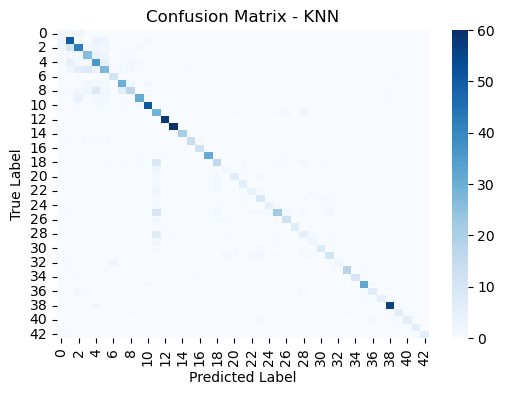

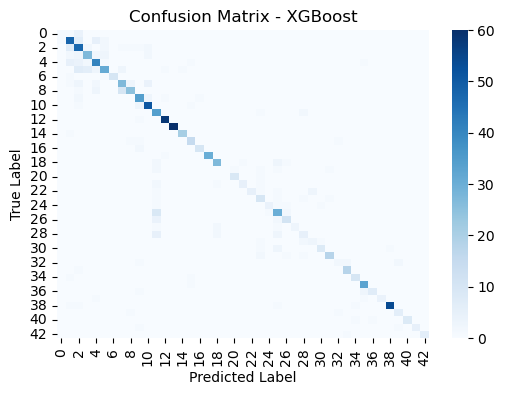

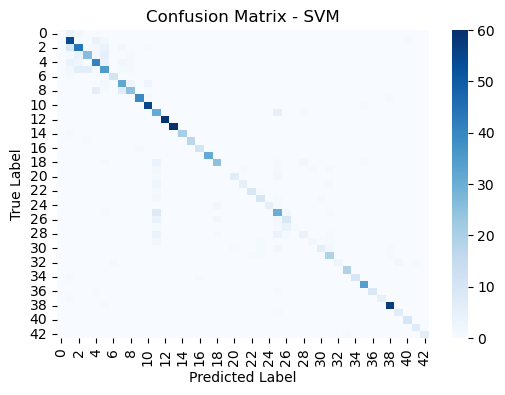

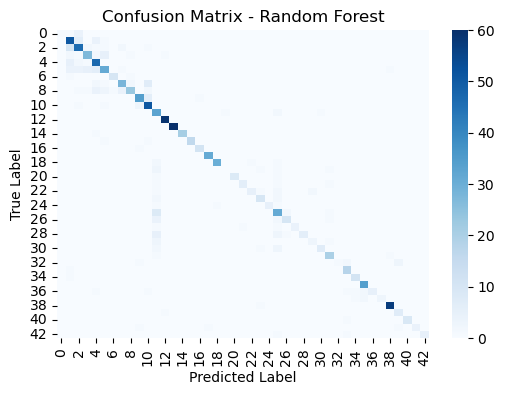

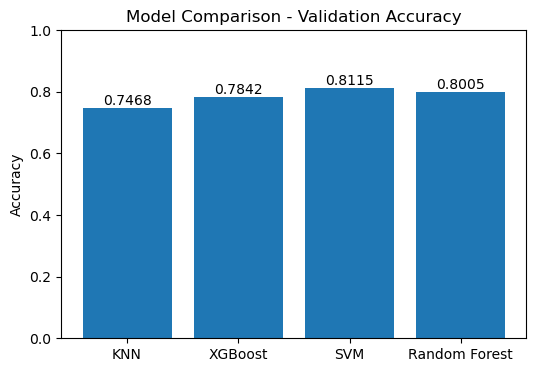

In [25]:
train_models('rf')

Best model with lasso feature selection: Random Forest with accuracy 0.8015


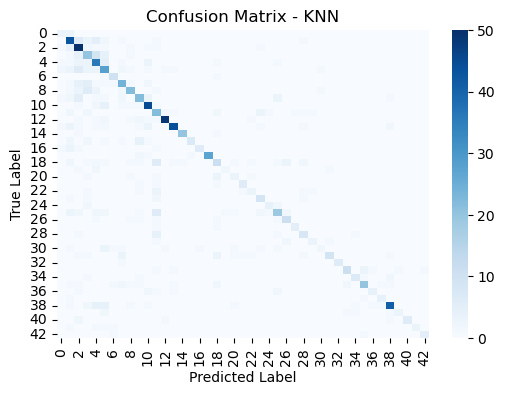

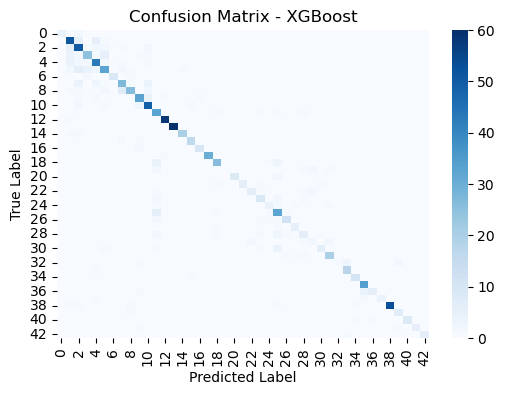

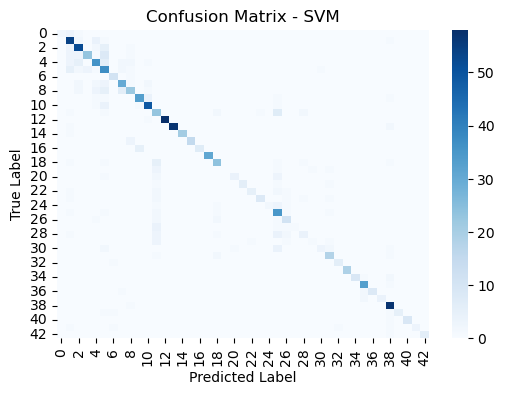

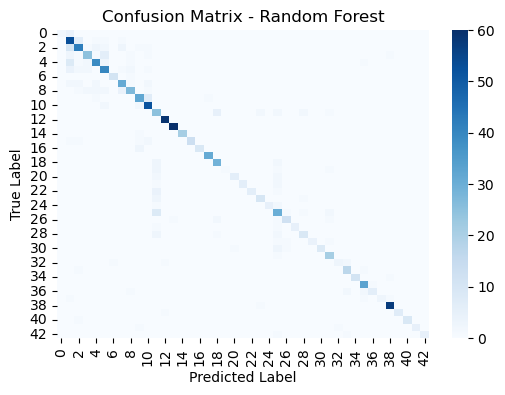

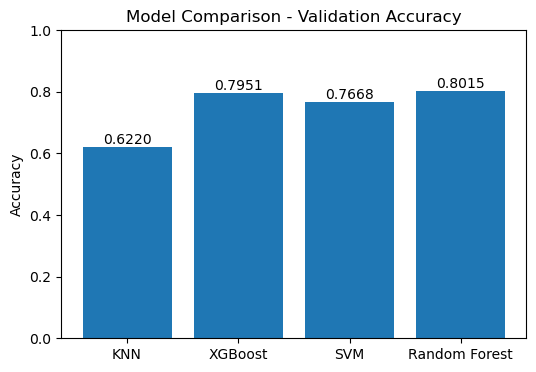

In [26]:
train_models('lasso')

Best model with mi feature selection: Random Forest with accuracy 0.7832


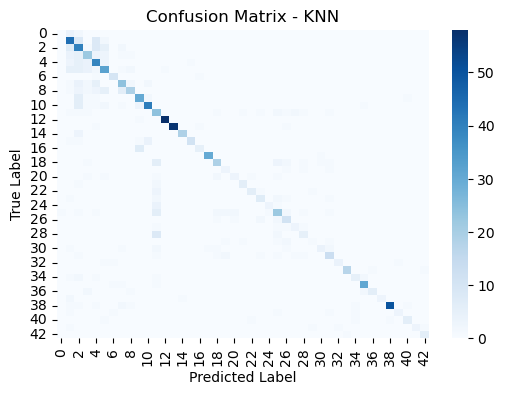

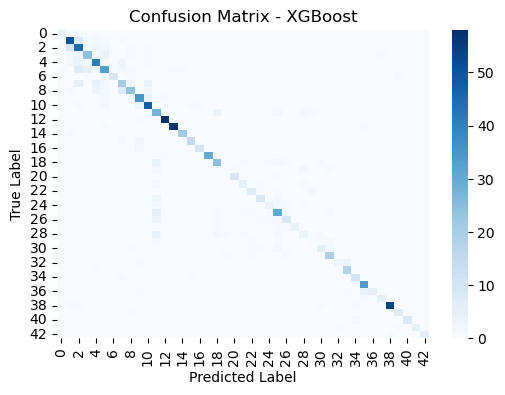

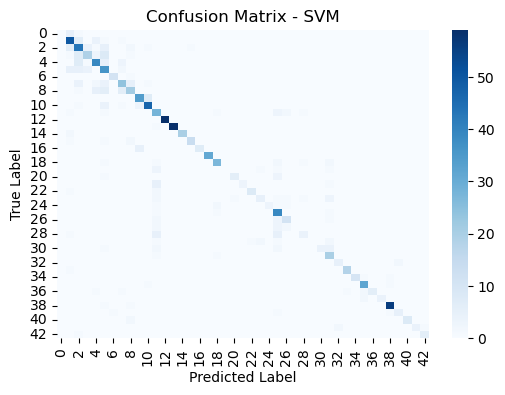

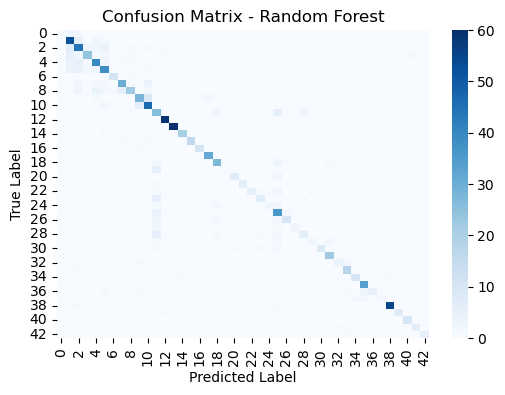

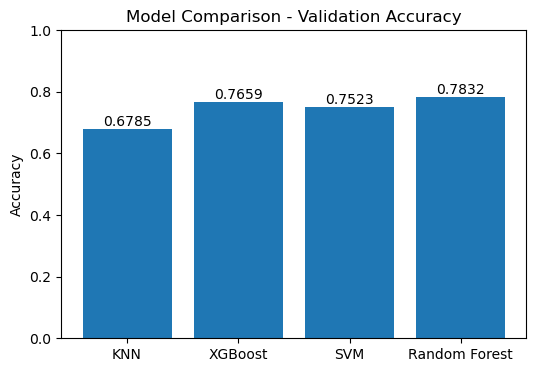

In [27]:
train_models('mi')